# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
# import numpy as np
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# X, y = mnist['data'], mnist['target']

import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [20]:
print(f'the shape for X is :{X.shape},\nThe shape of y is:{y.shape}')


the shape for X is :(70000, 784),
The shape of y is:(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [8]:
print(X[36000])#Ok, tried first only calling X[i] but printing it is 
# a better way of spotting this. It looks like a 3 (but later I understood that it is not)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   4. 149. 255. 184.  12.   0.   0.   0.   0.   0.   0.
   0. 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

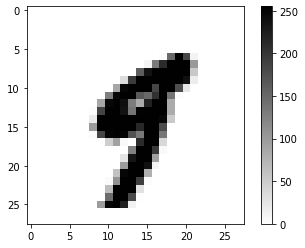

In [9]:
import matplotlib
import matplotlib.pyplot as plt



ax = plt.imshow(X[36000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.colorbar(ax)
plt.show() 

#Wow is not really what I thought!

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [ ]:
#Done in the previous

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [18]:
X_train,X_test, y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape 
y_train.shape
X_test.shape
y_test.shape #When I ran this, I noticed I forgot the : for X and y test...

(10000,)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [24]:
y_train5, y_test5 = np.where(y_train == '5', 1, 0),np.where(y_test == '5',1, 0)
X_train.shape 
y_train5.shape 
X_test.shape 
y_test5.shape
#Ok, just checking that the results are the same


(10000,)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [29]:
from sklearn.linear_model import LogisticRegression

model5 = LogisticRegression().fit(X_train, y_train5)
#Warning about mas_iter. I tried adding a max_iter = 10000 or 5000 or 1000 but it was very slow and it didn't run

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Does the classifier predict correctly the 36000th digit we picked before?

In [38]:
y_pred5 = model5.predict(X[36000].reshape(1,-1))
y_pred5

# The prediction was 0, so no five.
# this is ok because it was a 9 as previously stated

array([0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [54]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [55]:
never_5_clf.fit(X_train, y_train5)
#Actually here, if we look at the classifier function, we notice that the fit part of it doesn't really do
# anything "pass". So whatever we put here is irrelevant, we only do it for the syntax
# we should also do it here on the train data 

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [65]:
from sklearn.metrics import confusion_matrix
y_predNever = never_5_clf.predict(X_test)
y_pred = model5.predict(X_test)

confusionM = confusion_matrix(y_test5, y_pred)
print(f' the confusion marix for the first model is: \n{confusionM}')

confusionM2 = confusion_matrix(y_test5, y_predNever)
print(f' the confusion marix for the second model is: \n{confusionM2}')

 the confusion marix for the first model is: 
[[9034   74]
 [ 147  745]]
 the confusion marix for the second model is: 
[[9108    0]
 [ 892    0]]


Text(0.5, 1.1, 'Confusion matrix')

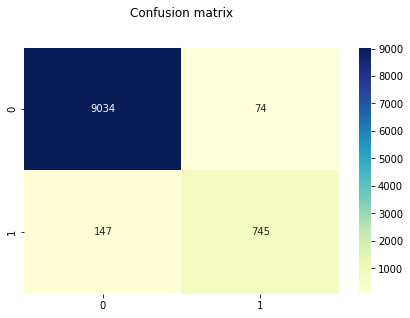

In [75]:
import seaborn as sns
import pandas as pd
%matplotlib inline

# create heatmap

ax[0] = sns.heatmap(pd.DataFrame(confusionM), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)


Text(0.5, 1.1, 'Confusion matrix2')

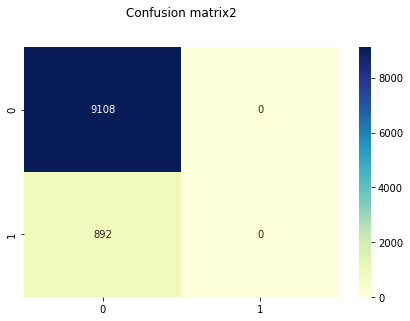

In [76]:

ax[1] = sns.heatmap(pd.DataFrame(confusionM2), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix2', y=1.1)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [66]:
#The second model will never see negatives, because it is built to only give 0s. and the false positives will indeed be 
# the 5s correct?
#Without any knowledge on this dta, I would chose the first one

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Accuracy = accuracy_score(y_test5, y_pred)
Accuracy2 = accuracy_score(y_test5, y_predNever)
print(f' the 1st model has a precision of: {Accuracy}\n the 2nd one : {Accuracy2}')

precision = precision_score(y_test5, y_pred)
precision2 = precision_score(y_test5, y_predNever)
print(f' the 1st model has a precision of: {precision}\n the 2nd one : {precision2}')

RecallScore = recall_score(y_test5, y_pred)
RecallScore2 = recall_score(y_test5,  y_predNever)
print(f' the 1st model has a recall score of: {RecallScore}\n the 2nd one : {RecallScore2}')

F1Score = f1_score(y_test5, y_pred)
F1Score2 = f1_score(y_test5,  y_predNever)
print(f' the 1st model has a recall score of: {F1Score}\n the 2nd one : {F1Score2}')

 the 1st model has a precision of: 0.9779
 the 2nd one : 0.9108
 the 1st model has a precision of: 0.9096459096459096
 the 2nd one : 0.0
 the 1st model has a recall score of: 0.8352017937219731
 the 2nd one : 0.0
 the 1st model has a recall score of: 0.8708357685563999
 the 2nd one : 0.0


### Now find the roc_auc_score for each. 

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_test5,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr)
plt.legend(loc=4)
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

### What does this metric tell you? Which classifier works better with this metric in mind?